In [1]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.DataFrame()

In [6]:
data = {'X1': [1, 2, 3, 4, 5, 6, 6, 7, 9, 9],
        'X2': [5, 3, 6, 8, 1, 9, 5, 8, 9, 2],
        'label': [1, 1, 0, 1, 0, 1, 0, 1, 0, 0]}

df = pd.DataFrame(data)


In [7]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

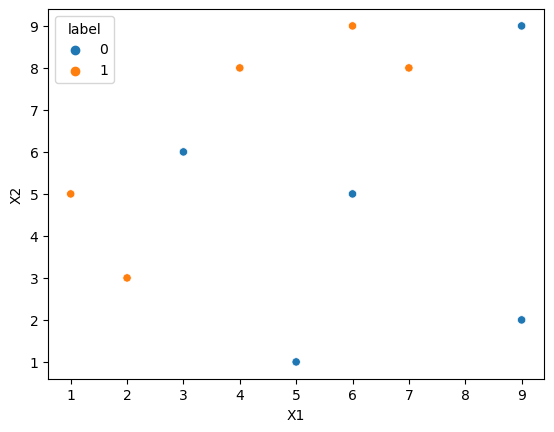

In [8]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [9]:
df['weights'] = 1/df.shape[0]

In [10]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
ft1 = DecisionTreeClassifier(max_depth=1)

In [13]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [15]:
ft1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

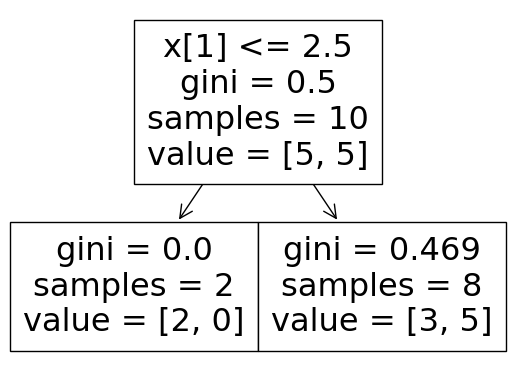

In [16]:
from sklearn.tree import plot_tree
plot_tree(ft1)

<Axes: >

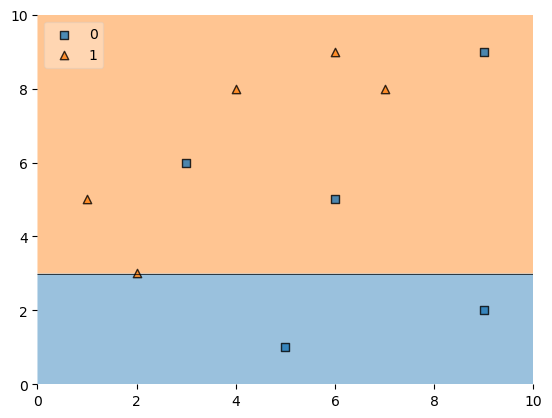

In [17]:
plot_decision_regions(X,y,clf=ft1,legend=2)

In [18]:
df['y_pred'] = ft1.predict(X)

In [19]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [20]:
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [21]:
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [22]:
def update_row_weights(row,alpha=0.423):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [23]:
df['updated_weights'] = df.apply(update_row_weights,axis = 1)

In [24]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [25]:
df['updated_weights'].sum()

0.9165153319682015

In [26]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [27]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [28]:
df['normalized_weights'].sum()

1.0

In [29]:
df['cumsum_upper'] = np.cumsum(df['normalized_weights'])

In [30]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [31]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_upper','cumsum_lower']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,1.000000,0.928525


In [32]:
def create_new_dataset(df):
    indices = []
    for i in range(df.shape[0]):
        a = np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [33]:
index_values = create_new_dataset(df)

In [34]:
index_values

[7, 8, 7, 8, 6, 5, 8, 2, 4, 9]

In [35]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [36]:
second_df

,X1,X2,label,weights
7,7,8,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
8,9,9,0,0.1
2,3,6,0,0.1
4,5,1,0,0.1
9,9,2,0,0.1


In [56]:
dt2 = DecisionTreeClassifier(max_depth=2)

In [57]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [58]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=2)

[Text(0.6, 0.8333333333333334, 'x[0] <= 7.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.4, 0.5, 'x[1] <= 7.0\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

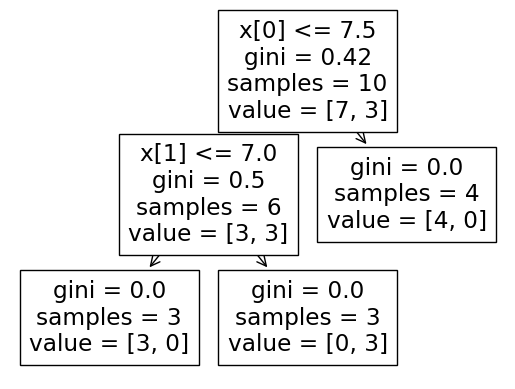

In [59]:
plot_tree(dt2)

<Axes: >

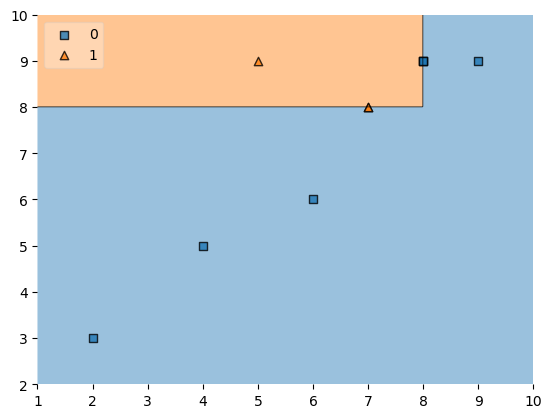

In [63]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [60]:
second_df['y_pred'] = dt2.predict(X)

In [61]:
second_df

,X1,X2,label,weights,y_pred
0,7,8,1,0.1,1
1,8,9,0,0.1,0
2,7,8,1,0.1,1
3,8,9,0,0.1,0
4,6,6,0,0.1,0
5,5,9,1,0.1,1
6,8,9,0,0.1,0
7,2,3,0,0.1,0
8,4,5,0,0.1,0
9,9,9,0,0.1,0


In [70]:
alpha2 = calculate_model_weight(0.1)

In [71]:
alpha2

1.0986122886681098